# Importing Libraries

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv(r"C:\Users\Abhay\Desktop\data sets/Mall_Customers_Corrupted_v2.csv")

In [28]:
df.shape

(206, 5)

In [29]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,107,Female,66.0,63.0,50.0
1,197,Female,45.0,126.0,28.0
2,84,Female,46.0,54.0,44.0
3,56,Male,47.0,43.0,41.0
4,58,Male,69.0,44.0,46.0


In [30]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,206.000000,196.000000,196.000000,195.000000
mean,100.165049,40.489796,71.938776,50.717949
std,57.841684,17.971056,76.814237,25.470772
min,1.000000,18.000000,15.000000,1.000000
25%,50.250000,28.750000,41.500000,35.000000
50%,99.500000,36.500000,62.000000,50.000000
75%,150.750000,49.000000,78.000000,73.000000
max,200.000000,138.000000,616.000000,99.000000


In [31]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Data Pre-Processing

## Handling missing values

In [32]:
print("\nMissing values before cleaning:\n", df.isnull().sum())



Missing values before cleaning:
 CustomerID                 0
Gender                     0
Age                       10
Annual Income (k$)        10
Spending Score (1-100)    11
dtype: int64


## Filling missing numerical columns with median



In [33]:
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [34]:
print("\nMissing values after filling:\n", df.isnull().sum())


Missing values after filling:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## Removing Duplicates

In [35]:
print("\nDuplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())



Duplicates before: 6
Duplicates after: 0


## Treating Outliers

In [36]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

#### Replace outliers with boundary values

In [46]:
df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)

In [48]:
df.to_csv("Mall_Customers_NoOutliers.csv", index=False)

In [39]:
df.describe

<bound method NDFrame.describe of      CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)
0           107  Female  66.0                63.0                    50.0
1           197  Female  45.0               126.0                    28.0
2            84  Female  46.0                54.0                    44.0
3            56    Male  47.0                43.0                    41.0
4            58    Male  69.0                44.0                    46.0
..          ...     ...   ...                 ...                     ...
200           9    Male  64.0                19.0                     3.0
201         129    Male  59.0                71.0                    11.0
202          20  Female  35.0                23.0                    98.0
203           8  Female  23.0                18.0                    94.0
205          65    Male  63.0                48.0                    51.0

[200 rows x 5 columns]>

In [40]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Univariate Analysis

### Using "for loop" to draw Distplot for each column

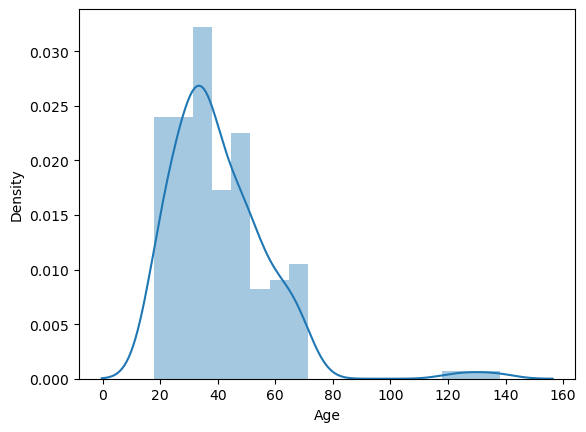

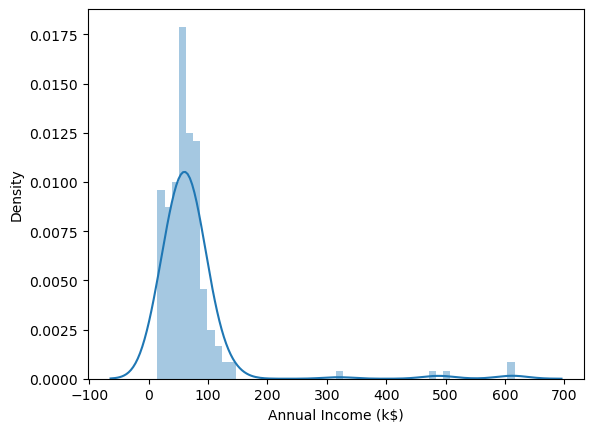

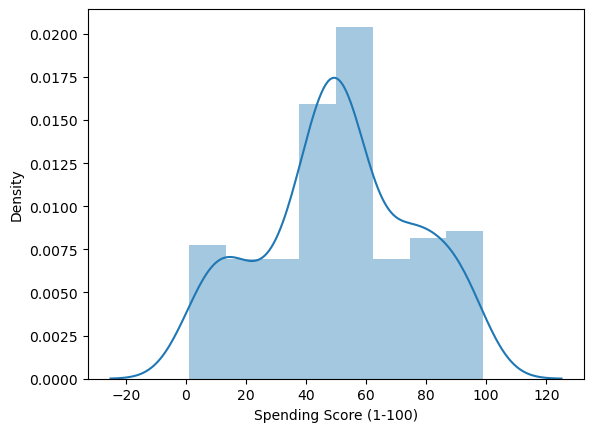

In [43]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

### Using "for loop" to draw KDE Plot for each column

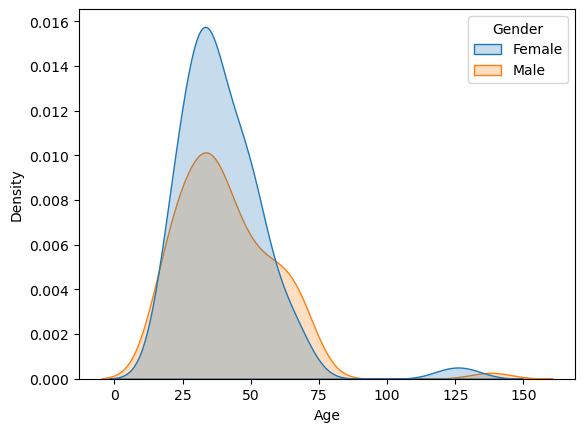

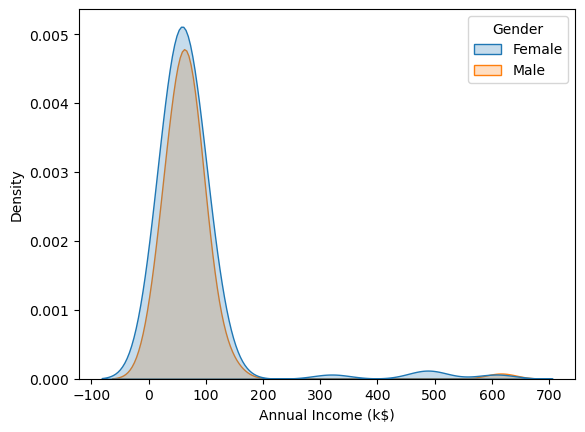

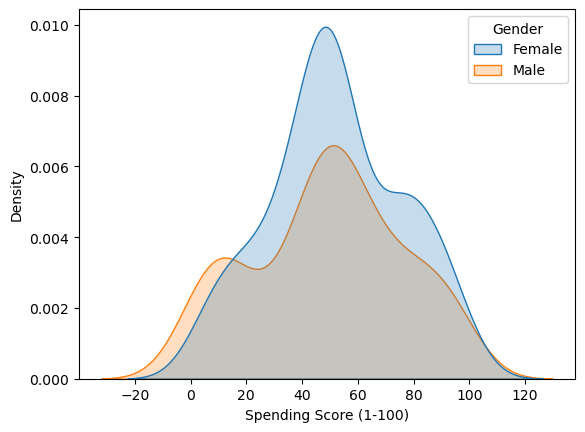

In [44]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['Gender'])

## Using "for loop" to draw Boxplot for each column

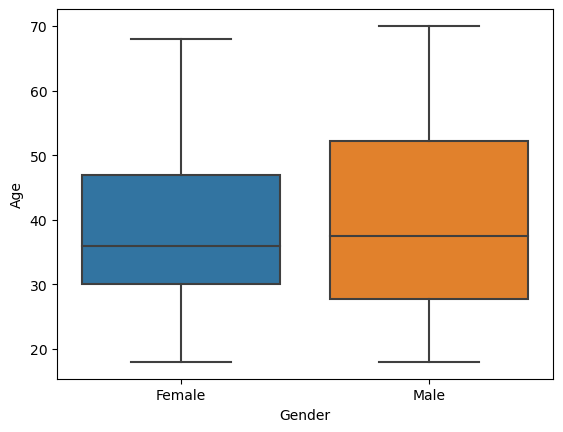

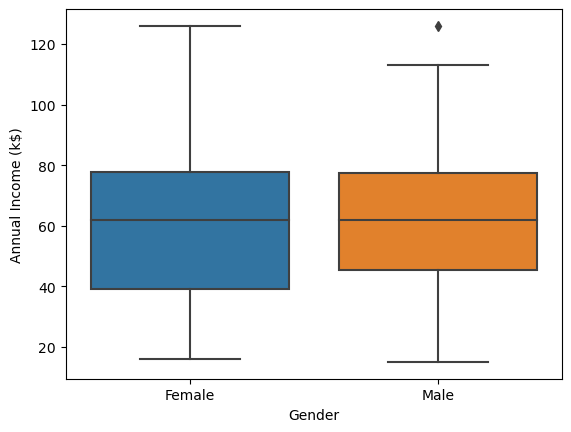

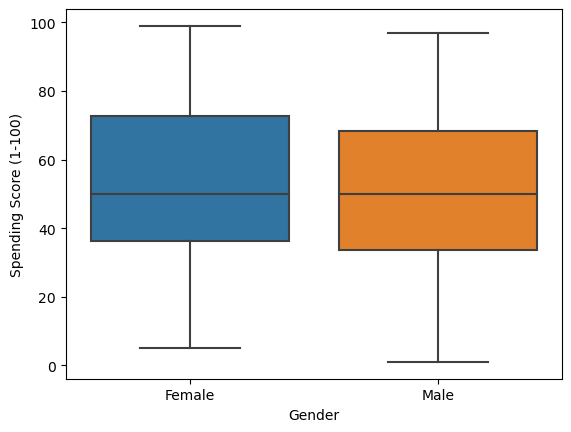

In [54]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

## Treating Outliers

In [50]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

### Appied  the function to each numerical column

In [51]:
for col in num_cols:
    before = df.shape[0]
    df = remove_outliers(df, col)
    after = df.shape[0]
    print(f"Removed {before - after} outliers from '{col}'")

Removed 3 outliers from 'Age'
Removed 7 outliers from 'Annual Income (k$)'
Removed 0 outliers from 'Spending Score (1-100)'


### Save the cleaned data

In [52]:
df.to_csv("Mall_Customers_NoOutliers.csv", index=False)


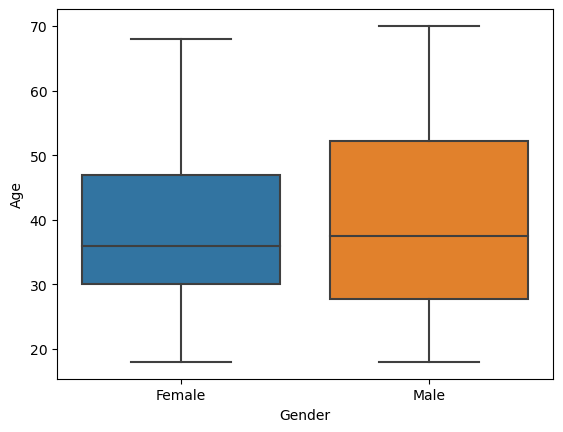

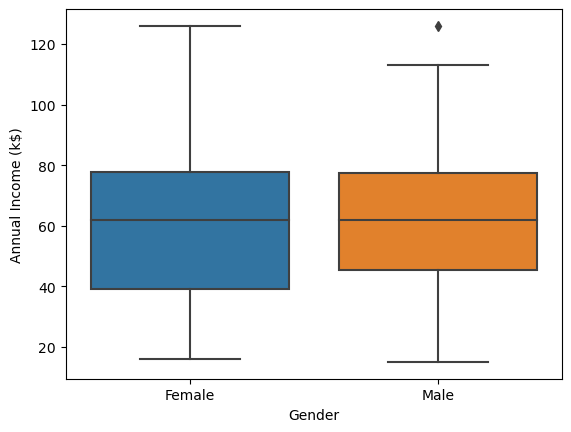

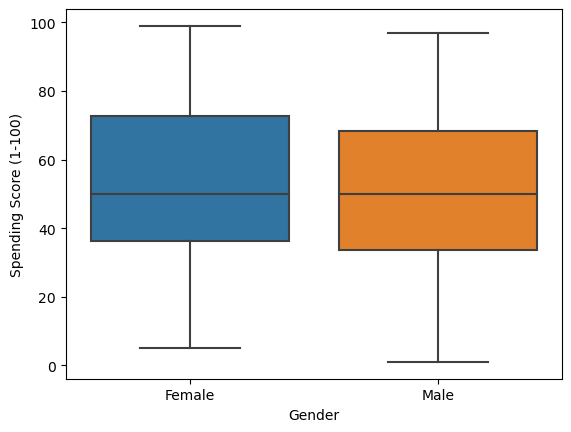

In [53]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [55]:
df['Gender'].value_counts(normalize=True)

Female    0.557895
Male      0.442105
Name: Gender, dtype: float64